<a href="https://colab.research.google.com/github/22922511/Potato-Disease-Classification/blob/main/Code/version4Dieses_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
import numpy as np
##

In [ ]:
img_size=256
batch_size=32
channel=3
epochs=30
n_classes=3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/ Disease Classification /DataSet",
    image_size=img_size,
    shuffle=True,
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [ ]:
disease_name=dataset.class_names

In [ ]:
disease_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

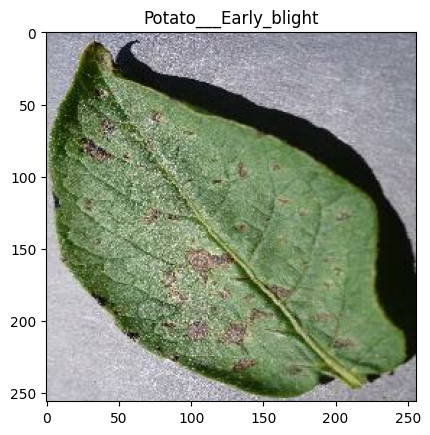

In [ ]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(disease_name[label_batch[0]])

In [ ]:
def train_test_split(df,train_split=.8,val_split=.1,test_split=.1,shuffle=True,shuffle_size=1000):
  if shuffle:
    df=df.shuffle(shuffle_size,seed=12)

  len_data_set=len(df)

  train_size=int(train_split*len_data_set)
  val_size=int(val_split*len_data_set)

  train_df=df.take(train_size)
  val_df=df.skip(train_size).take(val_size)
  test_df=df.skip(train_size).skip(val_size)

  return train_df,val_df,test_df

In [ ]:
  train_df,val_df,test_df=train_test_split(dataset)

In [ ]:
print("length of train = ",len(train_df))
print("length of test = ",len(test_df))
print("length of val = ",len(val_df))

length of train =  54
length of test =  8
length of val =  6


In [ ]:
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_rescale= tf.keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Resizing(img_size, img_size)
])

In [ ]:
data_augmented= tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
# model=models.Sequential([
#     resize_rescale,
#     data_augmented,
#     layers.Conv2D(32,(3,3),activation='relu',input_shape=(batch_size,img_size,img_size,channel)),
#     layers.MaxPool2D((2,2)),

#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#      layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#      layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#      layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#      layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#     layers.Flatten(),

#     layers.Dense(64,activation='relu'),
#     layers.Dense(n_classes,activation='softmax'),
# ])

# #

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    resize_rescale,
    data_augmented,

    layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'),
    layers.MaxPool2D((2,2)),


    layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'),
    layers.MaxPool2D((2,2)),


    layers.Flatten(),

    layers.Dense(64,activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),      # ← Important dropout before softmax
    layers.Dense(n_classes,activation='softmax'),
])


In [ ]:
model.build(input_shape=(batch_size,img_size,img_size,channel));

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [ ]:
hstory=model.fit(
    train_df,
    epochs=40,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_df,
    callbacks=[ early_stop]
)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4611 - loss: 1.4958 - val_accuracy: 0.6302 - val_loss: 0.9890
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.5165 - loss: 0.9160 - val_accuracy: 0.6198 - val_loss: 0.9204
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5638 - loss: 0.7820 - val_accuracy: 0.6979 - val_loss: 0.7994
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.6894 - loss: 0.7185 - val_accuracy: 0.7292 - val_loss: 0.6895
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7117 - loss: 0.6521 - val_accuracy: 0.7760 - val_loss: 0.6091
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.7593 - loss: 0.5409 - val_accuracy: 0.7604 - val_loss: 0.4883
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8255 - loss: 0.4511 - val_accuracy: 0.8281 - val_loss: 0.3749
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8410 - loss: 0.3947 - val_accuracy: 0.

In [ ]:
 scores=model.evaluate(test_df)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9917 - loss: 0.0483


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

y_true = []
y_pred = []

for images, labels in val_df:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Precision: 0.9883597883597884
Recall: 0.9886579284169645
F1 Score: 0.9884871141694512


In [ ]:
scores

[0.05784834176301956, 0.984375]

In [ ]:
hstory.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [ ]:
hstory.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
acc=hstory.history['accuracy']
loss=hstory.history['loss']
val_loss=hstory.history['val_loss']
val_acc=hstory.history['val_accuracy']
#####################################



ValueError: x and y must have same first dimension, but have shapes (16,) and (29,)

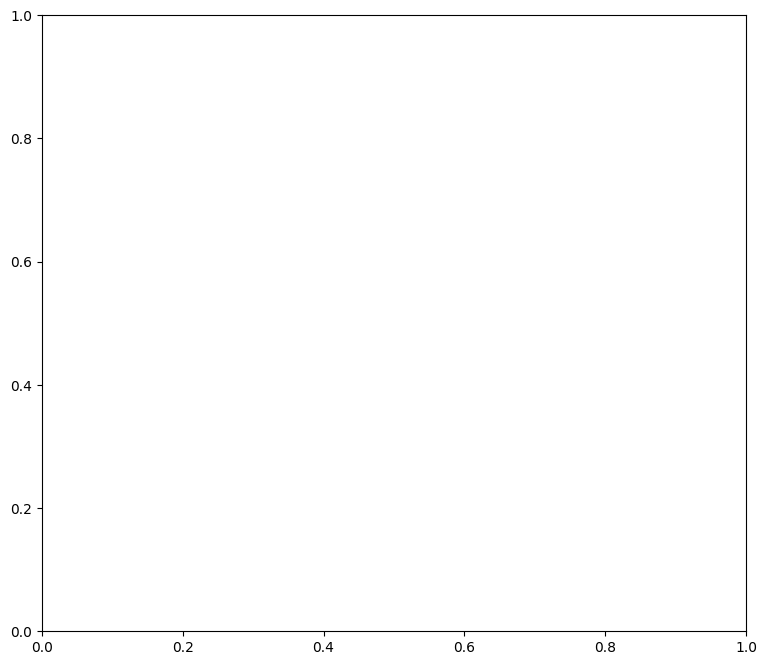

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(range(16), acc, label='Training Accuracy')
plt.plot(range(16), val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


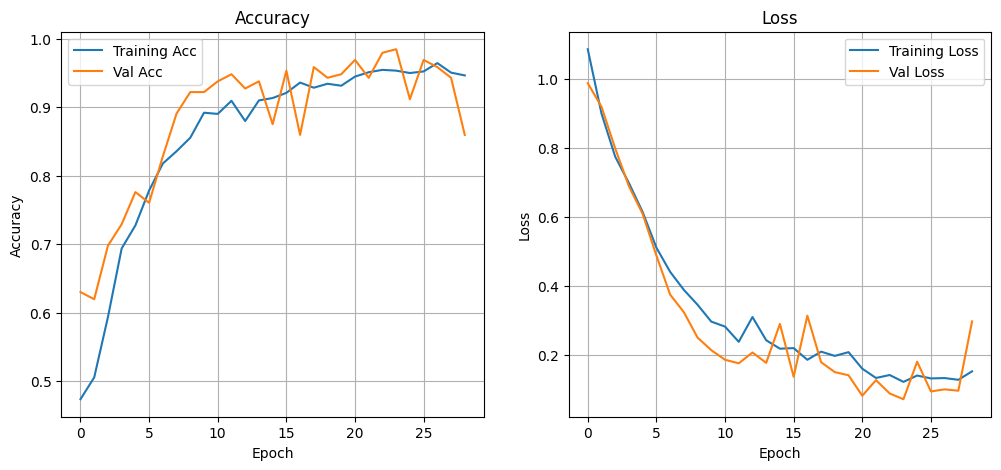

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(acc, label="Training Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")              # X-axis label
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()
plt.xlabel("Epoch")              # X-axis label
plt.ylabel("Loss")
plt.grid(True)

plt.show()


In [ ]:
def predict(model,img):
  img_arr=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_arr=tf.expand_dims(img_arr,0)

  prediction=model.predict(img_arr)

  name=disease_name[np.argmax(prediction[0])]
  confidence=100*(np.max(prediction[0]),2)

  return name,confidence





In [ ]:
plt.figure(figsize=(12,12))

for images ,labels in test_df.take(1):
  for i in range(6):
    px=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    name_of_disease,confience=predict(model,images[i].numpy())
    real_disease_name=disease_name[labels[i]]

    plt.axis("off")
    plt.title(f"Actual: {real_disease_name},\n predicted : {name_of_disease}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/s

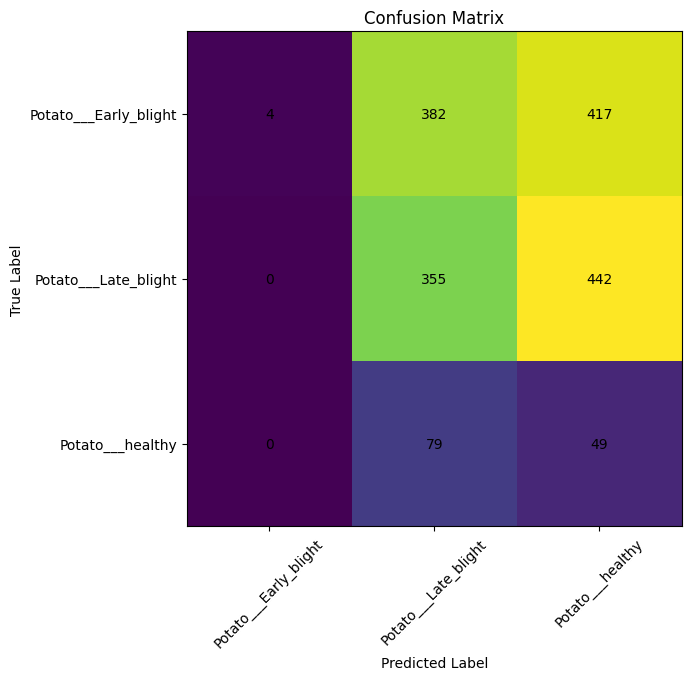

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Collect predictions
y_true = []
y_pred = []

for images, labels in train_df:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
classes = disease_name  # your class labels

# Plot confusion matrix
plt.figure(figsize=(7,7))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate each cell
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.tight_layout()
plt.show()
